This script follows these steps:

* Generates a sample signal by combining sine waves of 10 Hz, 60 Hz (the frequency we want to filter out), and 120 Hz, along with some random noise.
* Plots the original signal for comparison.
* Applies an FIR filter using mne.filter.filter_data, specifically designed to remove frequencies around 60 Hz. The l_freq and h_freq parameters define the edges of the stop band. Adjust these values depending on the specific frequencies you wish to filter out. The l_trans_bandwidth and h_trans_bandwidth parameters control the transition bandwidths.
* Plots the filtered signal to show the effect of the filtering.
* Make sure to adjust the filtering parameters (l_freq, h_freq, l_trans_bandwidth, and h_trans_bandwidth) based on the specific frequencies you wish to filter out from your signal.

Setting up band-stop filter from 50 - 70 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 50.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 49.50 Hz)
- Upper passband edge: 70.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 70.50 Hz)
- Filter length: 1651 samples (3.302 s)

Setting up band-pass filter from 50 - 70 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Blackman window with 0.0017 passband ripple and 74 dB stopband attenuation
- Lower passband edge: 50.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 49.50 Hz)
- Upper passband edge: 70.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 70.50 Hz

/tmp/ipykernel_1126590/2536497358.py:25: RuntimeWarning: filter_length (1651) is longer than the signal (500), distortion is likely. Reduce filter length or filter a longer signal.
  filtered_signal = mne.filter.filter_data(signal, sfreq=fs, l_freq=70, h_freq=50, method='fir', fir_design='firwin', l_trans_bandwidth=1, h_trans_bandwidth=1, phase='zero')
/tmp/ipykernel_1126590/2536497358.py:43: RuntimeWarning: filter_length (2501) is longer than the signal (500), distortion is likely. Reduce filter length or filter a longer signal.
  filtered_signal = mne.filter.filter_data(signal, sfreq=fs, l_freq=50, h_freq=70, method='fir', fir_design='firwin', fir_window='blackman', l_trans_bandwidth=1, h_trans_bandwidth=1, phase='zero')
/tmp/ipykernel_1126590/2536497358.py:61: RuntimeWarning: filter_length (2501) is longer than the signal (500), distortion is likely. Reduce filter length or filter a longer signal.
  filtered_signal = mne.filter.filter_data(signal, sfreq=fs, l_freq=40, h_freq=None, m

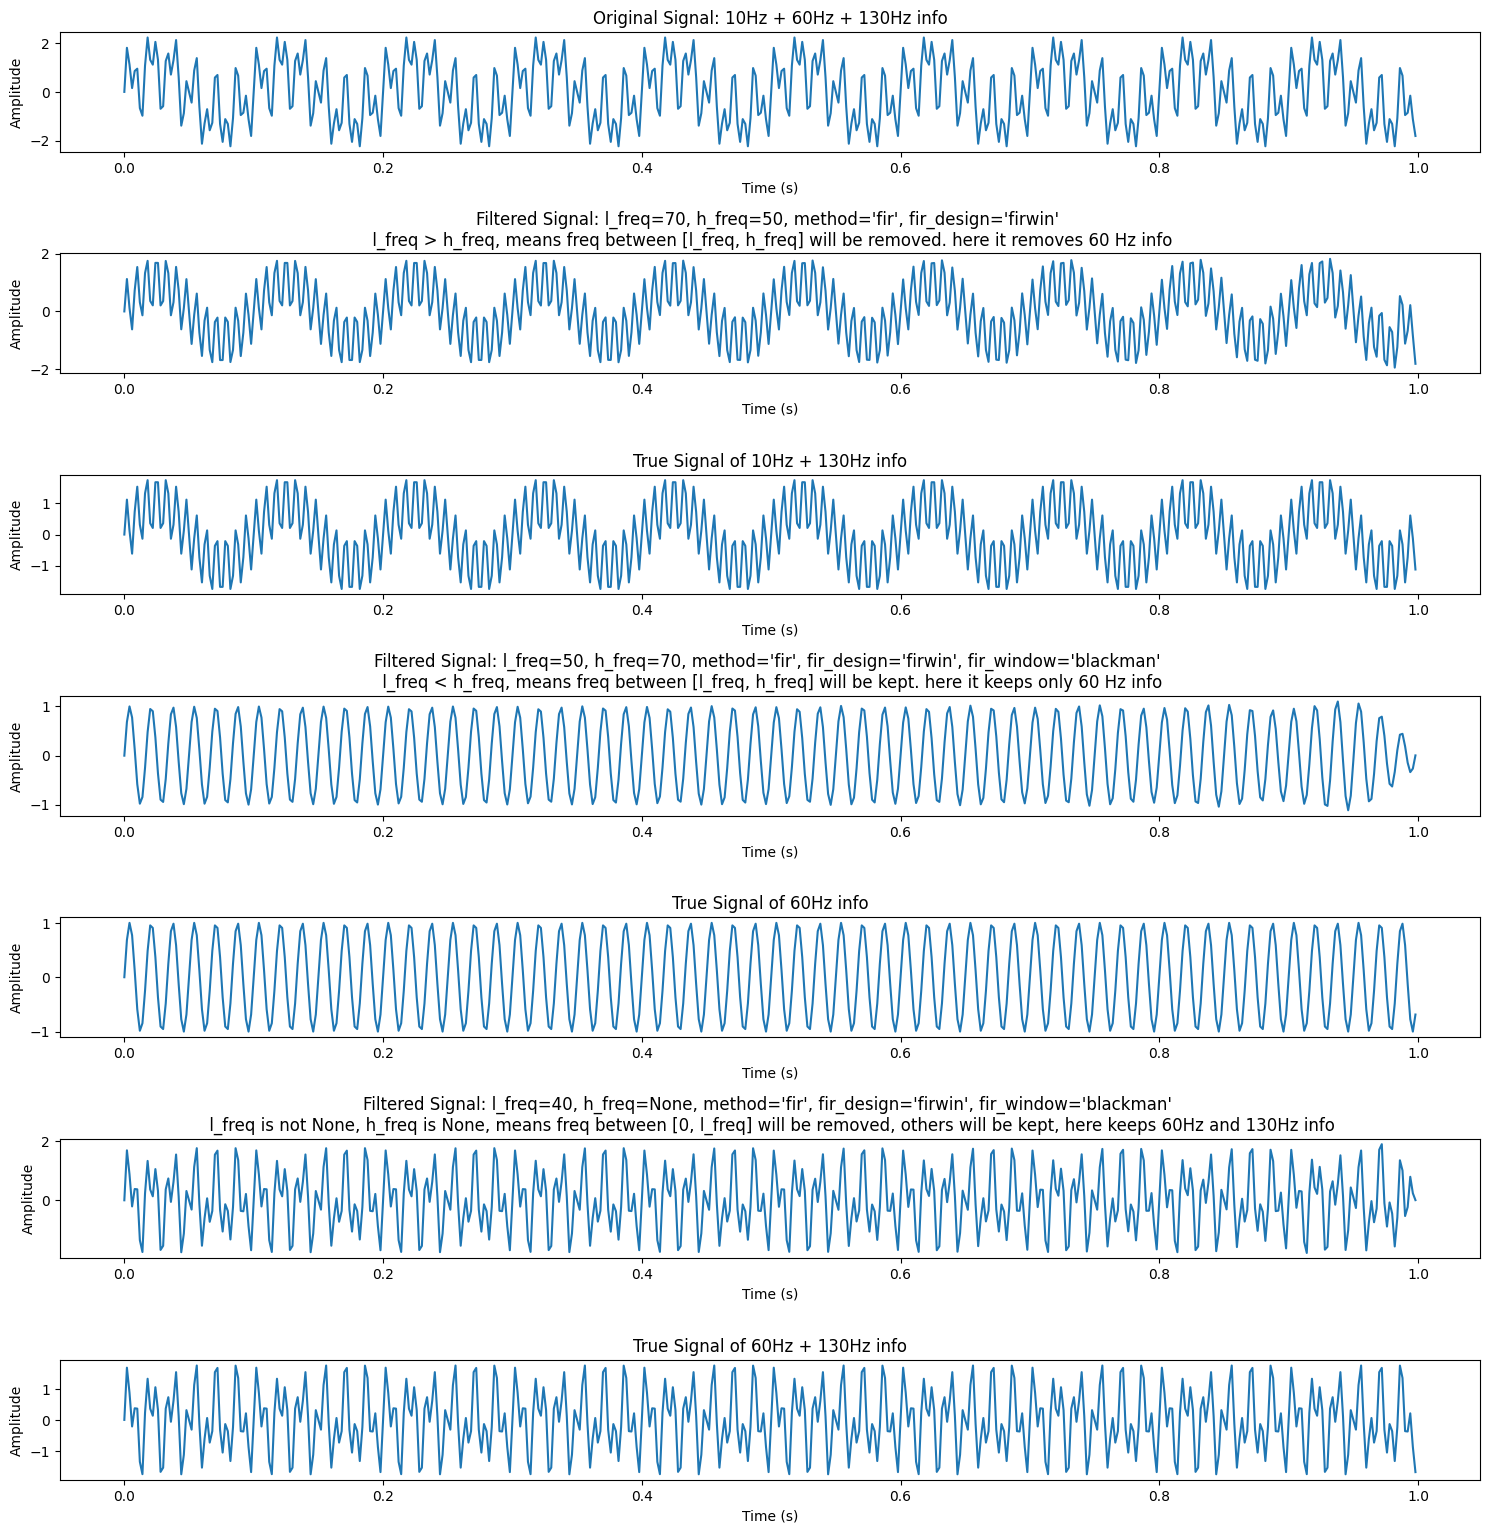

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import mne

# Generate a sample signal: combine several frequencies and add noise
fs = 500  # Sampling frequency in Hz
times = np.arange(0, 1, 1/fs)  # 1 second of data
# signal = np.sin(2 * np.pi * 10 * times) + np.sin(2 * np.pi * 60 * times) + np.sin(2 * np.pi * 120 * times) + 0.5 * np.random.randn(len(times))
signal = np.sin(2 * np.pi * 10 * times) + np.sin(2 * np.pi * 60 * times) + np.sin(2 * np.pi * 130 * times) 


# Plot the original signal
plt.figure(figsize=(15, 15))

num_rows = 7

plt.subplot(num_rows, 1, 1)
plt.plot(times, signal)
plt.title('Original Signal: 10Hz + 60Hz + 130Hz info')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Use MNE to create an FIR filter to remove 60 Hz
# Note: Adjust 'l_freq' and 'h_freq' to define the filter's passband
filtered_signal = mne.filter.filter_data(signal, sfreq=fs, l_freq=70, h_freq=50, method='fir', fir_design='firwin', l_trans_bandwidth=1, h_trans_bandwidth=1, phase='zero')

# Plot the filtered signal
plt.subplot(num_rows, 1, 2)
plt.plot(times, filtered_signal)
plt.title("Filtered Signal: l_freq=70, h_freq=50, method='fir', fir_design='firwin' \n l_freq > h_freq, means freq between [l_freq, h_freq] will be removed. here it removes 60 Hz info")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()

true_signal = np.sin(2 * np.pi * 10 * times) + np.sin(2 * np.pi * 130 * times) 
plt.subplot(num_rows, 1, 3)
plt.plot(times, true_signal)
plt.title('True Signal of 10Hz + 130Hz info')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Use MNE to create an FIR filter to remove 60 Hz
filtered_signal = mne.filter.filter_data(signal, sfreq=fs, l_freq=50, h_freq=70, method='fir', fir_design='firwin', fir_window='blackman', l_trans_bandwidth=1, h_trans_bandwidth=1, phase='zero')

# Plot the filtered signal
plt.subplot(num_rows, 1, 4)
plt.plot(times, filtered_signal)
plt.title("Filtered Signal: l_freq=50, h_freq=70, method='fir', fir_design='firwin', fir_window='blackman' \n l_freq < h_freq, means freq between [l_freq, h_freq] will be kept. here it keeps only 60 Hz info")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()

true_signal = np.sin(2 * np.pi * 60 * times)  
plt.subplot(num_rows, 1, 5)
plt.plot(times, true_signal)
plt.title('True Signal of 60Hz info')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')


filtered_signal = mne.filter.filter_data(signal, sfreq=fs, l_freq=40, h_freq=None, method='fir', fir_design='firwin', fir_window='blackman', l_trans_bandwidth=1, h_trans_bandwidth=1, phase='zero')
# Plot the filtered signal
plt.subplot(num_rows, 1, 6)
plt.plot(times, filtered_signal)
plt.title("Filtered Signal: l_freq=40, h_freq=None, method='fir', fir_design='firwin', fir_window='blackman' \n l_freq is not None, h_freq is None, means freq between [0, l_freq] will be removed, others will be kept, here keeps 60Hz and 130Hz info")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()

true_signal = np.sin(2 * np.pi * 60 * times) + np.sin(2 * np.pi * 130 * times)   
plt.subplot(num_rows, 1, 7)
plt.plot(times, true_signal)
plt.title('True Signal of 60Hz + 130Hz info')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.show()
